<a href="https://colab.research.google.com/github/monsieurshiva/AdvancedDeepLearning/blob/main/ObjectDetection/YOLO_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img=cv2.imread('/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/yolo/person_living_room.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img1=img.copy()

In [ ]:
img.shape

(1067, 1600, 3)

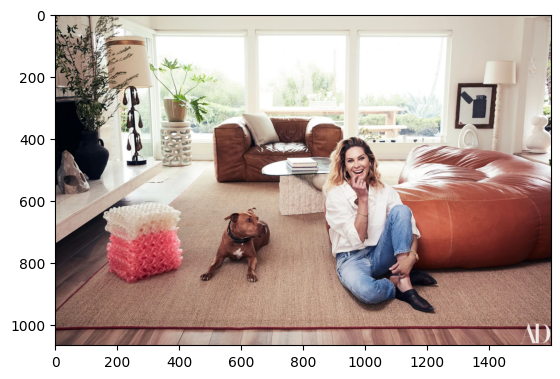

In [ ]:
plt.imshow(img)

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-30 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 35.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
results = model(img)
results.print()

image 1/1: 1067x1600 1 person, 1 dog, 1 couch, 2 potted plants, 1 book, 3 vases
Speed: 11.9ms pre-process, 3993.8ms inference, 46.2ms NMS per image at shape (1, 3, 448, 640)


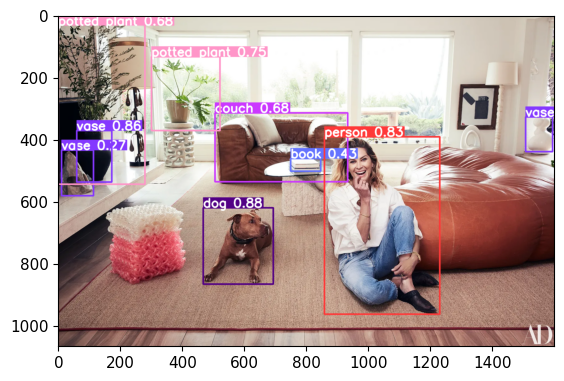

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.xyxy[0].cpu().detach().numpy()

array([[      468.6,      621.66,      694.11,      867.46,      0.8805,          16],
       [      60.44,      372.95,      173.49,      538.68,     0.86276,          75],
       [     859.77,      392.86,      1231.7,      964.42,     0.82513,           0],
       [     301.98,      134.36,      522.36,       372.1,     0.75296,          58],
       [     0.5668,           0,      280.45,      545.11,     0.68256,          58],
       [     506.07,      315.83,      934.27,      537.44,     0.67505,          57],
       [     750.44,      462.08,      847.74,      503.42,     0.43465,          73],
       [     1508.3,      328.31,      1595.5,      440.18,     0.35569,          75],
       [     11.009,      435.52,      114.65,      582.04,     0.27262,          75]], dtype=float32)

In [ ]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,468.602600,621.664062,694.113770,867.464661,0.880503,16,dog
1,60.439507,372.952271,173.493942,538.684082,0.862762,75,vase
2,859.771179,392.859955,1231.653809,964.420288,0.825129,0,person
3,301.977417,134.358963,522.362793,372.102631,0.752960,58,potted plant
4,0.566797,0.000000,280.450897,545.106812,0.682563,58,potted plant
5,506.068420,315.832916,934.270630,537.436035,0.675054,57,couch
6,750.440918,462.075562,847.741760,503.422699,0.434651,73,book
7,1508.344604,328.309875,1595.536377,440.180664,0.355690,75,vase
8,11.009326,435.523407,114.654907,582.043945,0.272622,75,vase


In [ ]:
# can u apply car09.jpg and tell what is the co-ordinate position of the car

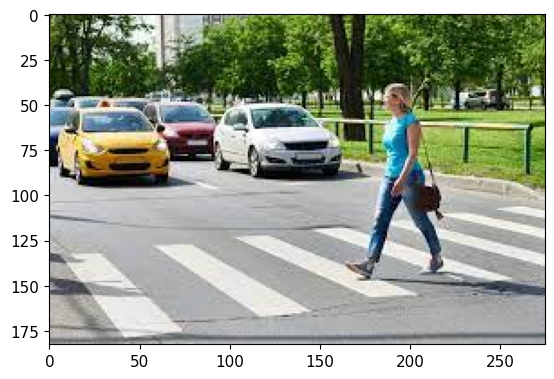

In [ ]:
img=cv2.imread('/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/yolo/car09.jfif')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
results_car=model(img)
print(results_car)

car_xyxy=results_car.pandas().xyxy[0]
print(car_xyxy)
int(car_xyxy['ymin'][0])

image 1/1: 183x275 1 person, 4 cars, 1 truck, 2 handbags, 1 skateboard
Speed: 3.2ms pre-process, 10.2ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)
         xmin        ymin        xmax        ymax  confidence  class  \
0   90.486649   49.579803  162.798035   91.510605    0.895011      2   
1    4.472471   51.691124   66.923584   95.876472    0.879536      2   
2  166.789581   38.379070  217.888779  146.988892    0.841561      0   
3   53.139481   49.081272   92.973465   81.477585    0.808257      2   
4    0.110598   51.367001   15.880882   84.982567    0.599689      2   
5  202.288300   81.168159  217.563400  110.370903    0.585710     26   
6  226.375809   42.460701  254.516678   54.079628    0.369299      7   
7  167.436310   37.602982  218.079163  148.461899    0.303086     26   
8  162.705307  134.685883  223.970306  149.210892    0.291791     36   

         name  
0         car  
1         car  
2      person  
3         car  
4         car  
5     handbag  
6     

49

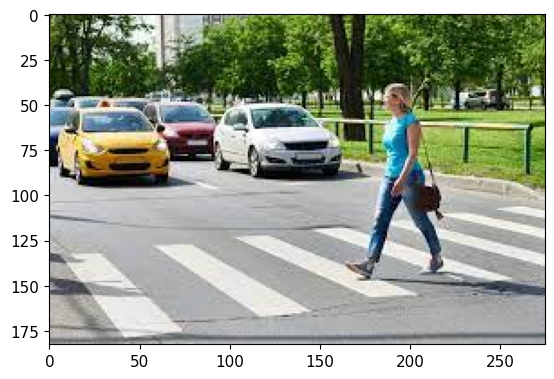

In [ ]:
plt.imshow(img)

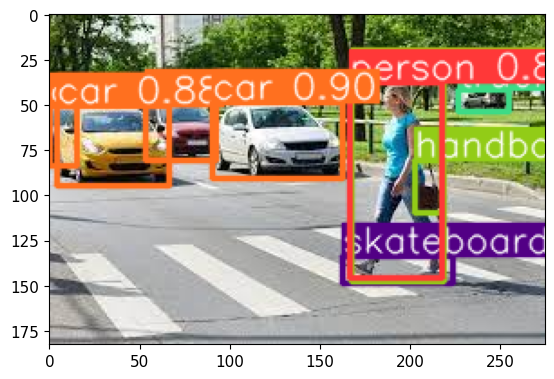

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results_car.render()))
plt.show()

In [ ]:
img.shape

(183, 275, 3)

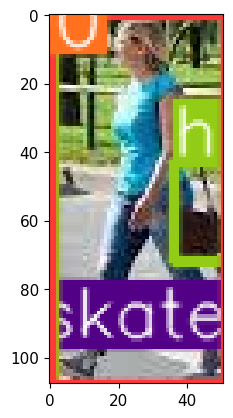

In [ ]:
plt.imshow(img[38:146,166:217,:])

In [ ]:
results_car.pandas().xywh[0]

,xcenter,ycenter,width,height,confidence,class,name
0,126.642342,70.545204,72.311386,41.930801,0.895011,2,car
1,35.698029,73.783798,62.451111,44.185349,0.879536,2,car
2,192.339172,92.683983,51.099197,108.609818,0.841561,0,person
3,73.056473,65.279427,39.833984,32.396313,0.808257,2,car
4,7.995740,68.174782,15.770285,33.615566,0.599689,2,car
5,209.925842,95.769531,15.275101,29.202744,0.585710,26,handbag
6,240.446243,48.270164,28.140869,11.618927,0.369299,7,truck
7,192.757736,93.032440,50.642853,110.858917,0.303086,26,handbag
8,193.337799,141.948395,61.264999,14.525009,0.291791,36,skateboard


dog


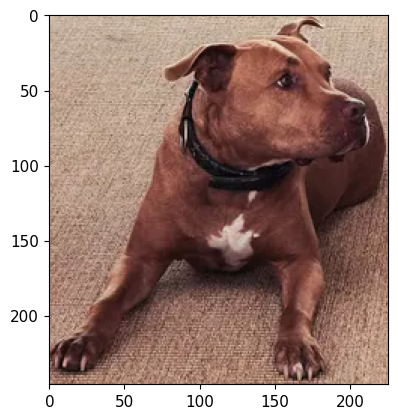

vase


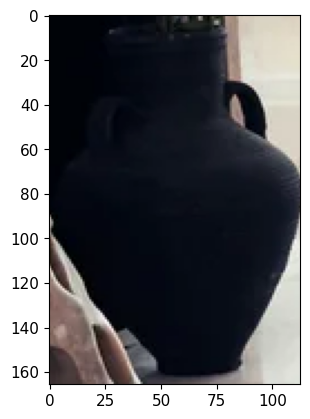

person


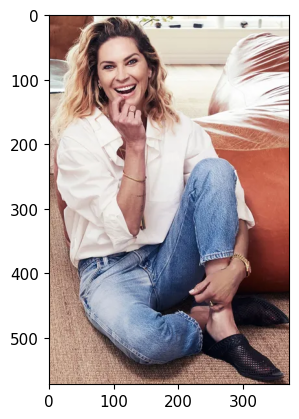

potted plant


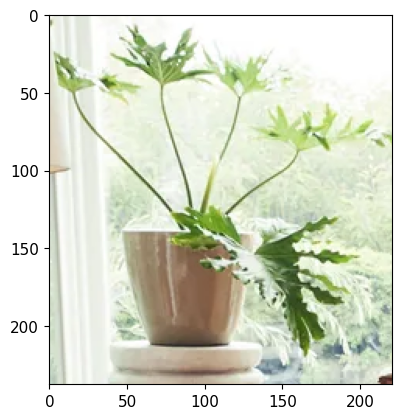

potted plant


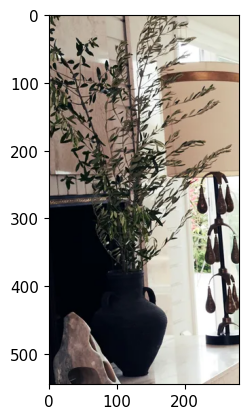

couch


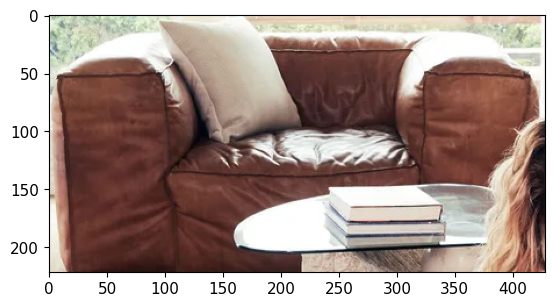

book


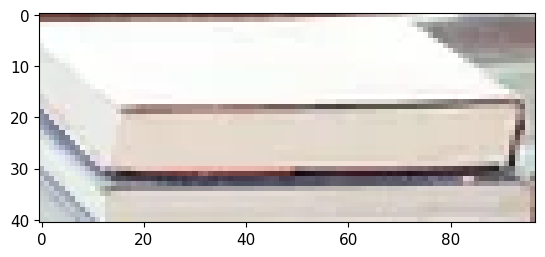

vase


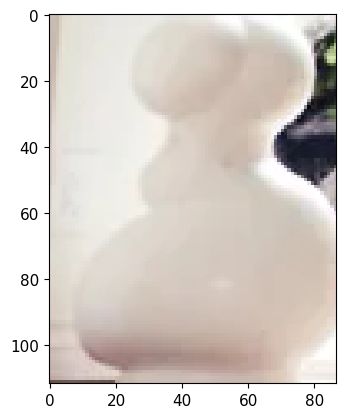

vase


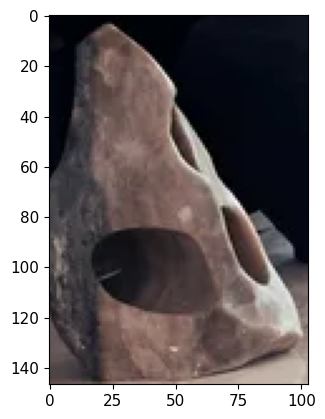

In [21]:
img=cv2.imread('/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/yolo/person_living_room.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

results=model(img)
#print(results_car)

xyxy=results.pandas().xyxy[0]

for i in range(len(xyxy)):
    print(xyxy['name'][i])
    plt.imshow(img[int(xyxy['ymin'][i]):int(xyxy['ymax'][i]),int(xyxy['xmin'][i]):int(xyxy['xmax'][i])])
    plt.show()

In [ ]:
# custom Training with YOLO to predict the licence plate